In [ ]:
import os
darknet_path = '/content'
os.chdir(darknet_path)
print(os.getcwd())

/content


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 14073 (delta 34), reused 28 (delta 13), pack-reused 14000
Receiving objects: 100% (14073/14073), 12.83 MiB | 7.11 MiB/s, done.
Resolving deltas: 100% (9559/9559), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version
#!vim Makefile

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
pwd()

'/content/darknet'

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-23 03:03:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   330KB/s    in 21m 31s 

2020-07-23 03:24:50 (188 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
 
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
 
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
 
# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
 
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
pwd()

'/content/darknet'

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

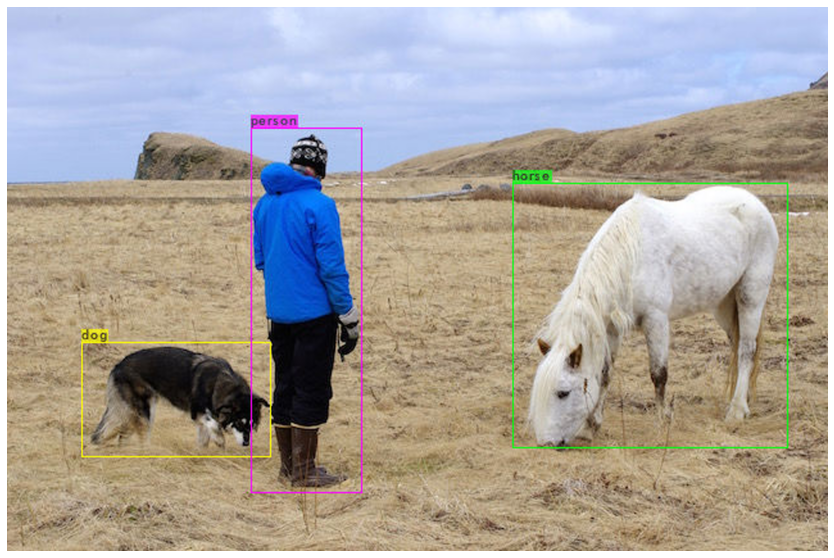

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
# show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

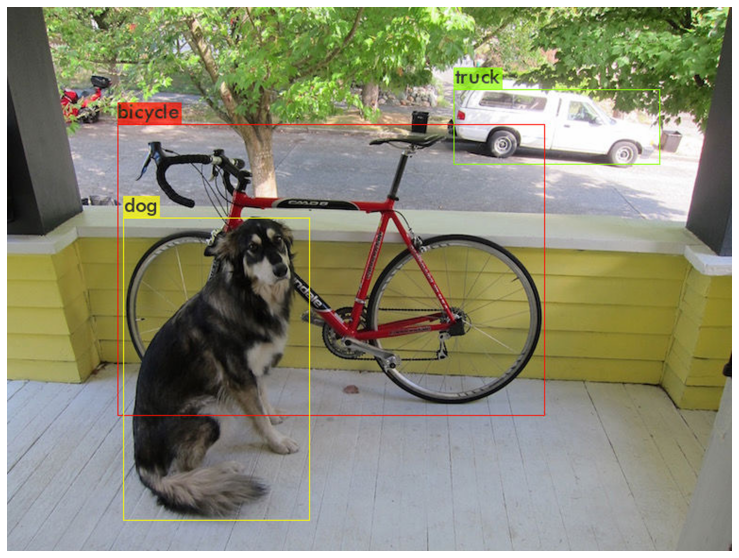

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
pwd()

'/content/darknet'

#Wheat Detection

In [ ]:
!./darknet

usage: ./darknet <function>


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
pwd()

'/content/darknet'

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil

# Data Preprocessing

In [ ]:

save_path = r'/content/drive/My Drive/Data/global-wheat-detection/train_1' #Here save those train images from given training data whics have bounding boxes
main_path = r'/content/drive/My Drive/Data/global-wheat-detection/train' #Main directory training data

In [ ]:
os.chdir(main_path)

In [ ]:
# Images which don't have bounding boxes
a = ['00b5c6764',
 '013669953',
 '015939012',
 '027086635',
 '030314634',
 '034090252',
 '037024e13',
 '038432e90',
 '044078e70',
 '059125072',
 '060740e25',
 '0874422e6',
 '09539e132',
 '0cf7ef43d',
 '0e7832f0b',
 '155c440e8',
 '1a9792bfc',
 '227971e53',
 '2443092e6',
 '2d80f9c49',
 '2e6c333a7',
 '3116768f0',
 '3542457e2',
 '366187e59',
 '3842535e1',
 '39614e195',
 '39a0e5556',
 '421657e44',
 '45fddc611',
 '46c6a747a',
 '4870004e7',
 '4972999e9',
 '49e40c7a4',
 '526d737d1',
 '581eaf87b',
 '5901a73fe',
 '595709e55',
 '5cbd092f9',
 '6298999e6',
 '6584c18c0',
 '65d0b13aa',
 '69352f3fa',
 '723068e09',
 '731334e31',
 '7e1caf1f7',
 '83a94fc79',
 '8425a537b',
 '8a5cb62db',
 '8de789df8',
 '91d4e3750',
 '952e7d15c',
 '9e21e7969',
 'a3ce975cd',
 'ab20ec355',
 'b45c5294d',
 'c18c32da0',
 'c74ca81bd',
 'ccb3892c1',
 'cf1d2f504',
 'cfc9040ca',
 'd771bb084',
 'd7e657453',
 'd83808467',
 'dd5d2fa9e',
 'de2a3cf37',
 'dec23c826',
 'e01ad95cf',
 'e4ec17f9b',
 'ec196d18a',
 'ed00a614d',
 'f2a6804d2',
 'f530a5d4b',
 'f9cafa47f',
 'ffbb9c623']

In [ ]:
#clean the bounding boxes file
df = pd.read_csv('/content/drive/My Drive/Data/global-wheat-detection/train_1.csv')
df.head()

image_id  width  height    xmin  ...  width.1  height.1   source label_name
0  b6ab77fd7   1024    1024  [834.0  ...     56.0      36.0  usask_1        abc
1  b6ab77fd7   1024    1024  [226.0  ...    130.0      58.0  usask_1        abc
2  b6ab77fd7   1024    1024  [377.0  ...     74.0     160.0  usask_1        abc
3  b6ab77fd7   1024    1024  [834.0  ...    109.0     107.0  usask_1        abc
4  b6ab77fd7   1024    1024   [26.0  ...    124.0     117.0  usask_1        abc

[5 rows x 9 columns]

In [ ]:
a = []
cnt = 0
for i in df['xmin']:
  if '[' in i:
    i = float(i[1:])
    a.append(i)
    cnt = cnt+1
print(a)

[834.0, 226.0, 377.0, 834.0, 26.0, 569.0, 52.0, 627.0, 412.0, 953.0, 30.0, 35.0, 103.0, 417.0, 764.0, 539.0, 139.0, 461.0, 215.0, 134.0, 737.0, 292.0, 0.0, 324.0, 663.0, 325.0, 155.0, 783.0, 534.0, 155.0, 101.0, 583.0, 36.0, 0.0, 25.0, 160.0, 202.0, 852.0, 904.0, 175.0, 612.0, 675.0, 959.0, 600.0, 575.0, 945.0, 216.0, 988.0, 331.0, 47.0, 682.0, 63.0, 824.0, 815.0, 468.0, 888.0, 3.0, 266.0, 582.0, 77.0, 673.0, 620.0, 224.0, 160.0, 961.0, 392.0, 0.0, 838.0, 542.0, 157.0, 206.0, 91.0, 0.0, 128.0, 31.0, 143.0, 223.0, 0.0, 0.0, 404.0, 466.0, 682.0, 491.0, 375.0, 405.0, 447.0, 121.0, 287.0, 945.0, 880.0, 878.0, 937.0, 200.0, 332.0, 285.0, 126.0, 363.0, 912.0, 182.0, 208.0, 109.0, 30.0, 245.0, 911.0, 47.0, 704.0, 674.0, 946.0, 788.0, 623.0, 559.0, 121.0, 637.0, 80.0, 245.0, 105.0, 71.0, 589.0, 926.0, 434.0, 579.0, 168.0, 232.0, 300.0, 69.0, 722.0, 800.0, 840.0, 853.0, 39.0, 216.0, 325.0, 195.0, 333.0, 124.0, 688.0, 639.0, 562.0, 665.0, 0.0, 681.0, 621.0, 291.0, 687.0, 822.0, 0.0, 41.0, 61.0, 

In [ ]:
print(len(a))
print(len(df['xmin']))

147793
147793


In [ ]:
df['xmin'] = a

In [ ]:
df.head()

image_id  width  height   xmin  ...  width.1  height.1   source label_name
0  b6ab77fd7   1024    1024  834.0  ...     56.0      36.0  usask_1        abc
1  b6ab77fd7   1024    1024  226.0  ...    130.0      58.0  usask_1        abc
2  b6ab77fd7   1024    1024  377.0  ...     74.0     160.0  usask_1        abc
3  b6ab77fd7   1024    1024  834.0  ...    109.0     107.0  usask_1        abc
4  b6ab77fd7   1024    1024   26.0  ...    124.0     117.0  usask_1        abc

[5 rows x 9 columns]

In [ ]:
df['width.1'] = df['width.1']/df['width']
df['height.1'] = df['height.1']/df['width']
df['xmin'] = df['xmin']/df['width']
df['ymin'] = df['ymin']/df['width']
df.head()

image_id  width  height      xmin  ...   width.1  height.1   source label_name
0  b6ab77fd7   1024    1024  0.814453  ...  0.054688  0.035156  usask_1        abc
1  b6ab77fd7   1024    1024  0.220703  ...  0.126953  0.056641  usask_1        abc
2  b6ab77fd7   1024    1024  0.368164  ...  0.072266  0.156250  usask_1        abc
3  b6ab77fd7   1024    1024  0.814453  ...  0.106445  0.104492  usask_1        abc
4  b6ab77fd7   1024    1024  0.025391  ...  0.121094  0.114258  usask_1        abc

[5 rows x 9 columns]

In [ ]:
df.to_csv('/content/drive/My Drive/Data/global-wheat-detection/csv/train_2.csv')

In [ ]:
full_path_to_csv = '/content/drive/My Drive/Data/global-wheat-detection/csv'
full_path_to_train_images = '/content/drive/My Drive/Data/global-wheat-detection/train'
full_path_to_test_images = '/content/drive/My Drive/Data/global-wheat-detection/test'

In [ ]:
import os

In [ ]:
classes = pd.read_csv('/content/drive/My Drive/Data/global-wheat-detection/csv/label.csv',usecols=[0,1],header=None)
classes

0      1
0  abc  wheat

In [ ]:
labels = ['wheat']

In [ ]:
encrypted_strings = []

for v in labels:
  sub_classes = classes.loc[classes[1]==v]
  print(sub_classes)

  e = sub_classes.iloc[0][0]
  print(e)

  encrypted_strings.append(e)

print()
print(labels)
print(encrypted_strings)

     0      1
0  abc  wheat
abc

['wheat']
['abc']


In [ ]:
annotations = pd.read_csv('/content/drive/My Drive/Data/global-wheat-detection/csv/train_2.csv',usecols=['image_id',
                                                                                                         'label_name',
                                                                                                         'xmin',
                                                                                                         'ymin',
                                                                                                         'width.1',
                                                                                                         'height.1'])
annotations.head()

image_id      xmin      ymin   width.1  height.1 label_name
0  b6ab77fd7  0.814453  0.216797  0.054688  0.035156        abc
1  b6ab77fd7  0.220703  0.535156  0.126953  0.056641        abc
2  b6ab77fd7  0.368164  0.492188  0.072266  0.156250        abc
3  b6ab77fd7  0.814453  0.092773  0.106445  0.104492        abc
4  b6ab77fd7  0.025391  0.140625  0.121094  0.114258        abc

In [ ]:
sub_ann = annotations.loc[annotations['label_name'].isin(encrypted_strings)].copy()
print(sub_ann.head())

    image_id      xmin      ymin   width.1  height.1 label_name
0  b6ab77fd7  0.814453  0.216797  0.054688  0.035156        abc
1  b6ab77fd7  0.220703  0.535156  0.126953  0.056641        abc
2  b6ab77fd7  0.368164  0.492188  0.072266  0.156250        abc
3  b6ab77fd7  0.814453  0.092773  0.106445  0.104492        abc
4  b6ab77fd7  0.025391  0.140625  0.121094  0.114258        abc


In [ ]:
sub_ann['class_number'] = ''
sub_ann['center x'] = ''
sub_ann['center y'] = ''
sub_ann['xmax'] = ''
sub_ann['ymax'] = ''

for i in range(len(encrypted_strings)):
  sub_ann.loc[sub_ann['label_name']==encrypted_strings[i], 'class_number'] = i

sub_ann['xmax'] = sub_ann['width.1'] + sub_ann['xmin']
sub_ann['ymax'] = sub_ann['height.1'] + sub_ann['ymin']

sub_ann['center x'] = (sub_ann['xmax']+sub_ann['xmin'])/2
sub_ann['center y'] = (sub_ann['ymax']+sub_ann['ymin'])/2

r = sub_ann.loc[:, ['image_id',
                    'class_number',
                    'center x',
                    'center y',
                    'width.1',
                    'height.1']].copy()
print(r.head())

    image_id class_number  center x  center y   width.1  height.1
0  b6ab77fd7            0  0.841797  0.234375  0.054688  0.035156
1  b6ab77fd7            0  0.284180  0.563477  0.126953  0.056641
2  b6ab77fd7            0  0.404297  0.570312  0.072266  0.156250
3  b6ab77fd7            0  0.867676  0.145020  0.106445  0.104492
4  b6ab77fd7            0  0.085938  0.197754  0.121094  0.114258


In [ ]:
print(os.getcwd())

/content/darknet


In [ ]:
os.chdir(full_path_to_train_images)
print(os.getcwd())

/content/drive/My Drive/Data/global-wheat-detection/train


In [ ]:
cnt = 0
for current_dir, dirs, files in os.walk('.'):
  for f in files:
    if f.endswith('.jpg'):
      image_name = f[:-4]

      sub_r = r.loc[r['image_id'] == image_name]

      resulted_frame = sub_r.loc[:,['class_number',
                                    'center x',
                                    'center y',
                                    'width.1',
                                    'height.1']].copy()

      path_to_save = full_path_to_train_images + '/' + image_name + '.txt'

      resulted_frame.to_csv(path_to_save, header = False, index = False, sep=' ')

train test split

In [ ]:
pwd()

'/content/drive/My Drive/Data/global-wheat-detection/train'

In [ ]:
p = []

for current_dir, dirs, files in os.walk('.'):
  for f in files:
    if f.endswith('.jpg'):

      path_to_save_into_txt_files = full_path_to_train_images + '/' +f

      p.append(path_to_save_into_txt_files + '\n')

p_test = p[:int(len(p) * 0.15)]

p = p[int(len(p) * 0.15): ]

with open('train.txt','w') as train_txt:

  for e in p:

    train_txt.write(e)

with open('test.txt', 'w') as test_txt:

  for e in p_test:
    test_txt.write(e)
    

Data and name.py

In [ ]:
full_path_to_train_images = '/content/drive/My Drive/Data/global-wheat-detection/train'

In [ ]:
c = 0
with open(full_path_to_train_images + "/" + "classes.names", 'w') as names, open(full_path_to_train_images + "/" + "classes.txt", 'r') as txt:
  for line in txt:
    names.write(line)
    c +=1



In [ ]:
with open(full_path_to_train_images + '/' +'custom_data.data','w') as data:

  data.write('classes = ' + str(c) + '\n')

  data.write('train = ' + full_path_to_train_images +'/' +'train.txt' + '\n')

  data.write('valid = '+ full_path_to_train_images + '/' + 'test.txt' + '\n')

  data.write('names = '+ full_path_to_train_images + '/' + 'classes.names' + '\n')

  data.write('backup = backup')

In [ ]:
import os
darknet_path = '/content/darknet'
os.chdir(darknet_path)
print(os.getcwd())

/content/darknet


In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-07-24 11:32:11--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   511KB/s    in 6m 52s  

2020-07-24 11:39:04 (385 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2020-07-22 02:39:37--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M   467KB/s    in 3m 16s  

2020-07-22 02:42:55 (395 KB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



In [ ]:
!./darknet

usage: ./darknet <function>


In [ ]:
!./darknet detector train custom_data.data yolov3_custom_train.cfg /content/darknet/yolov3_custom_train_20001.weights -dont_show 0

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000095, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000426, iou_loss = 0.000000, total_loss = 0.000426 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.779749, GIOU: 0.773252), Class: 0.999415, Obj: 0.686292, No Obj: 0.011495, .5R: 1.000000, .75R: 0.625000, count: 48, class_loss = 5.344052, iou_loss = 5.312241, total_loss = 10.656293 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.692325, GIOU: 0.665107), Class: 0.997567, Obj: 0.348513, No Obj: 0.001598, .5R: 0.961538, .75R: 0.307692, count: 26, class_loss = 7.098302, iou_loss = 7.527841, total_loss = 14.626143 
 total_bbox = 1101471, rewritten_bbox = 0.095690 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No

In [ ]:
!./darknet detector test /content/darknet/cfg/custom_data.data /content/darknet/yolov3_custom_test.cfg /content/darknet/backup/yolov3_custom_train_2000.weights -thresh 0.85 -ext_output data/2fd875eaa.jpg
imShow('predictions.jpg')

In [ ]:
!./darknet detector map /content/darknet/cfg/custom_data.data /content/darknet/yolov3_custom_test.cfg /content/darknet/backup/yolov3_custom_train_2000.weights data/2fd875eaa.jpg


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

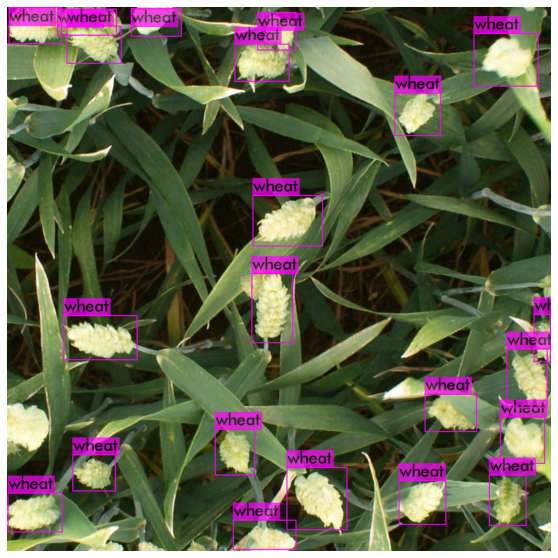

In [ ]:
!./darknet detector test /content/darknet/cfg/custom_data.data /content/darknet/yolov3_custom_test.cfg /content/darknet/backup/yolov3_custom_train_2000.weights data/2fd875eaa.jpg
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0


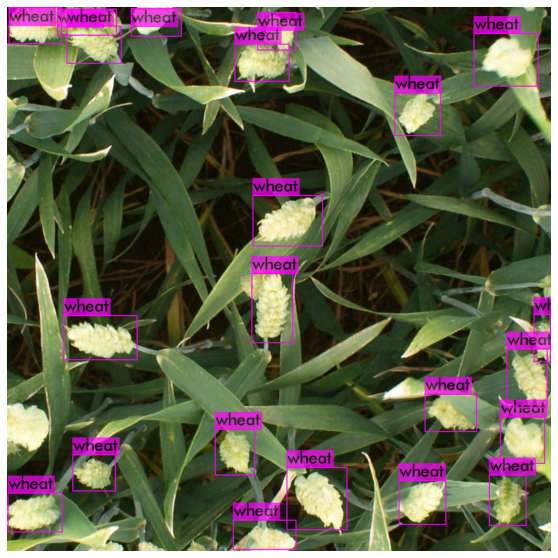

In [ ]:
!./darknet detector test /content/darknet/cfg/custom_data.data /content/darknet/backup/yolov3_custom_train_final.weights data/2fd875eaa.jpg
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0


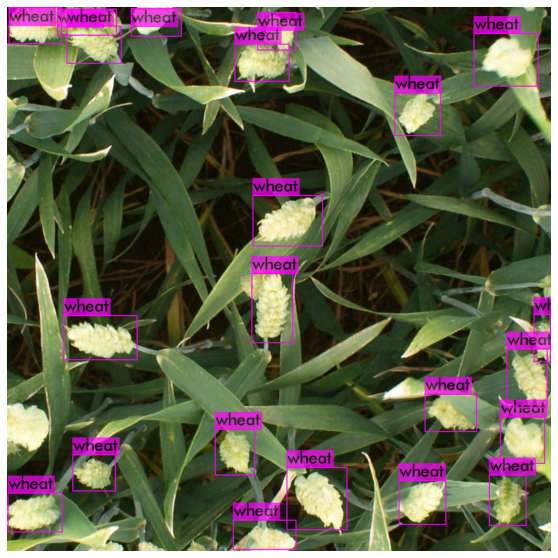

In [ ]:
!./darknet detector test /content/darknet/cfg/custom_data.data /content/darknet/backup/yolov3_custom_train_last.weights data/2fd875eaa.jpg
imShow('predictions.jpg')

In [ ]:
!./darknet detector map /content/darknet/cfg/custom_data.data /content/darknet/yolov3_custom_test.cfg /content/darknet/backup/yolov3_custom_train_last.weights


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

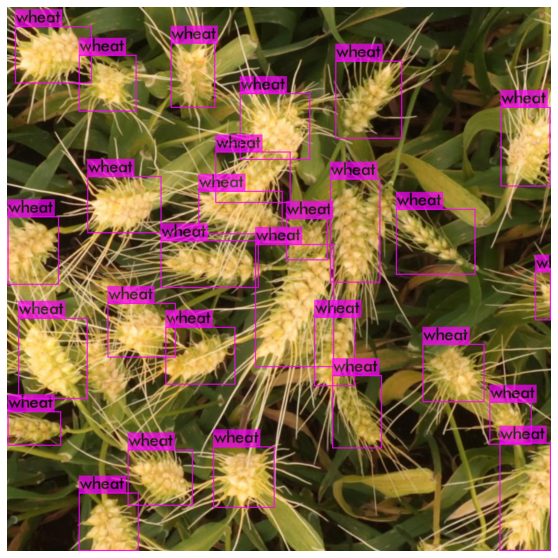

In [ ]:
!./darknet detector test /content/darknet/cfg/custom_data.data /content/darknet/yolov3_custom_test.cfg /content/darknet/backup/yolov3_custom_train_2000.weights -ext_output /content/darknet/data/53f253011.jpg
imShow('predictions.jpg')